In [86]:
import requests

url = 'https://www.openml.org/data/download/22102255/dataset'
r = requests.get(url, allow_redirects=True)

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [88]:
with open("dataset.txt","wb") as f: 
    f.write(r.content)

In [89]:
import pandas as pd
data = []
with open ("dataset.txt", "r") as f:
    for line in f.read().split("\n"):
        if line.startswith("@") or line.startswith("%") or line == "":
            continue
        data.append(line)


In [90]:
columns = []
with open("dataset.txt","r") as f:
    for line in f.read().split("\n"):
        if line.startswith("@ATTRIBUTE"):
            columns.append(line.split(" ")[1])

In [91]:
with open("df.csv","w") as f:
    f.write(",".join(columns))
    f.write("\n")
    f.write("\n".join(data))

In [92]:
df = pd.read_csv("df.csv")
df.columns = columns

In [93]:
df['t_win'] = df.round_winner.astype('category').cat.codes

In [94]:
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner,t_win
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T,1
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T,1
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T,1
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T,1


In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
correlations = df[columns+['t_win']].corr(numeric_only=True)

In [96]:
print(correlations['t_win'].apply(abs).sort_values(ascending=False).iloc[:25])

t_win                           1.000000
ct_armor                        0.336382
ct_helmets                      0.308255
t_helmets                       0.297458
ct_defuse_kits                  0.291557
t_armor                         0.290753
ct_grenade_flashbang            0.253868
ct_players_alive                0.216798
ct_grenade_smokegrenade         0.209975
ct_weapon_awp                   0.198626
t_weapon_ak47                   0.194147
ct_health                       0.190662
bomb_planted                    0.187101
ct_weapon_m4a4                  0.178008
ct_grenade_hegrenade            0.168781
ct_grenade_incendiarygrenade    0.168517
ct_weapon_ak47                  0.166855
t_grenade_flashbang             0.166839
ct_weapon_sg553                 0.163963
t_weapon_sg553                  0.163709
ct_weapon_usps                  0.152893
t_weapon_awp                    0.149878
t_players_alive                 0.142518
t_grenade_smokegrenade          0.140348
t_weapon_usps   

In [97]:
selected_columns = []

for column in columns+['t_win']:
    try:
        if abs(correlations[column]['t_win']) > 0.15:
            selected_columns.append(column)
    except KeyError:
        pass

df_selected = df[selected_columns]


In [98]:
df_selected

,bomb_planted,ct_health,ct_armor,t_armor,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,ct_weapon_ak47,t_weapon_ak47,...,ct_weapon_m4a4,ct_weapon_sg553,t_weapon_sg553,ct_weapon_usps,ct_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_win
0,False,500.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
1,False,500.0,400.0,300.0,0.0,0.0,1.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
2,False,391.0,294.0,200.0,0.0,0.0,1.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
3,False,391.0,294.0,200.0,0.0,0.0,1.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
4,False,500.0,192.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,True,200.0,195.0,359.0,2.0,4.0,1.0,2.0,0.0,1.0,...,1.0,0.0,2.0,2.0,0.0,1.0,2.0,1.0,0.0,1
122406,False,500.0,95.0,175.0,1.0,2.0,1.0,5.0,0.0,0.0,...,1.0,0.0,1.0,5.0,0.0,1.0,2.0,1.0,0.0,1
122407,False,500.0,495.0,475.0,3.0,5.0,1.0,5.0,0.0,2.0,...,1.0,0.0,1.0,1.0,2.0,4.0,4.0,3.0,1.0,1
122408,False,500.0,495.0,475.0,3.0,5.0,1.0,5.0,0.0,2.0,...,1.0,0.0,2.0,1.0,2.0,1.0,5.0,0.0,0.0,1


<Axes: >

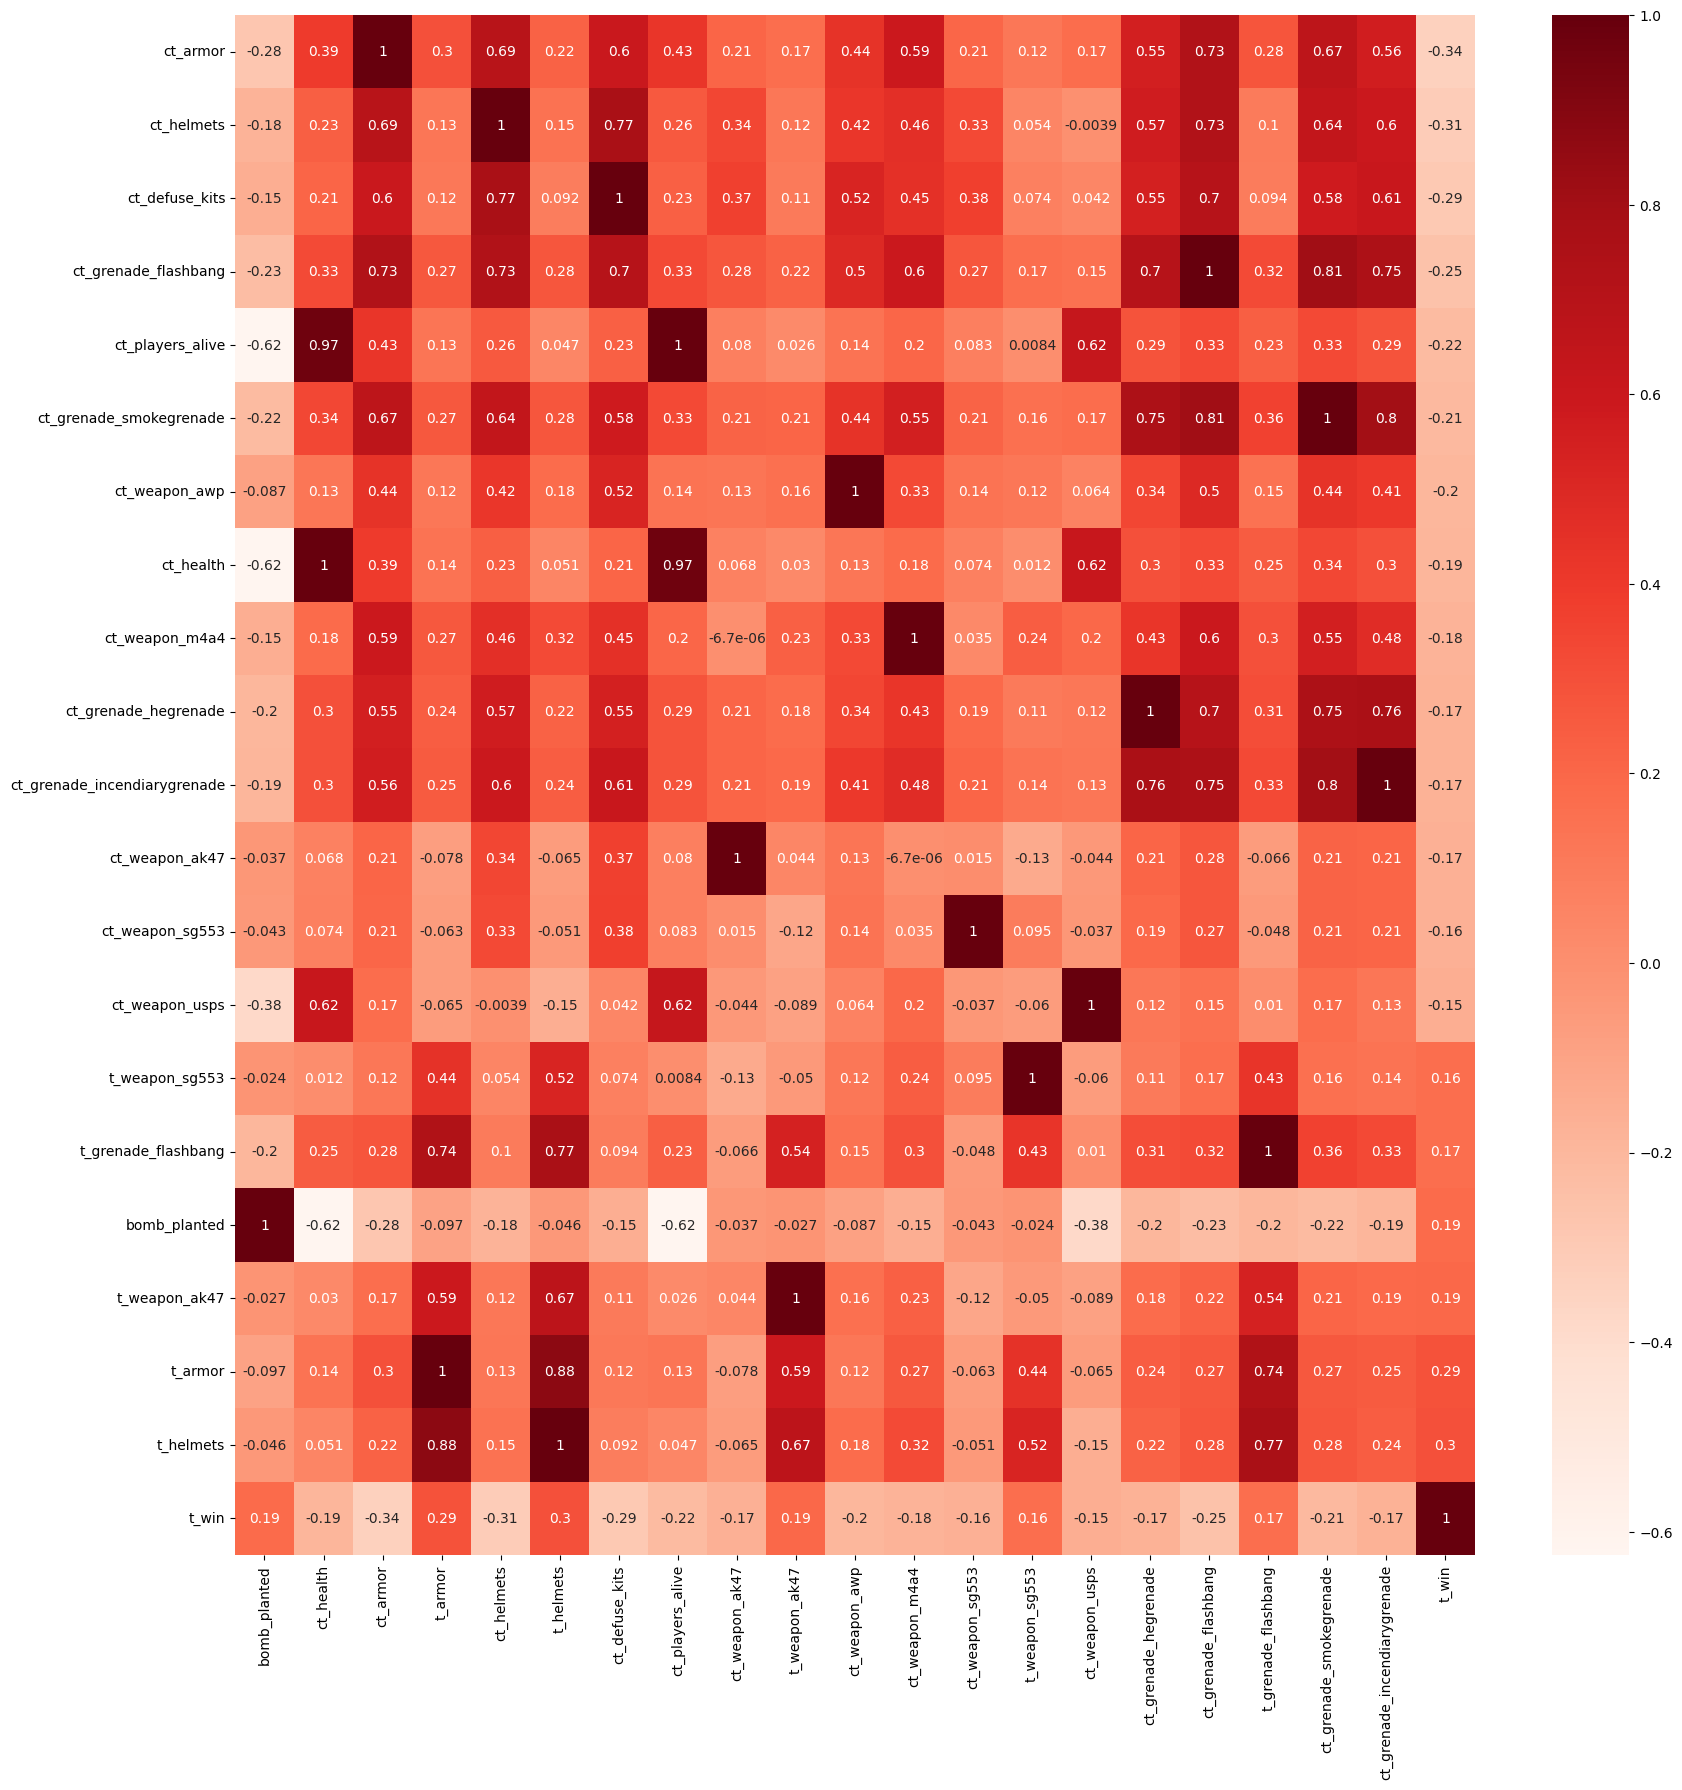

In [99]:
plt.figure(figsize=(20,20))
sns.heatmap(df_selected.corr().sort_values(by="t_win"), annot=True, cmap=plt.cm.Reds)

array([[<Axes: title={'center': 'ct_health'}>,
        <Axes: title={'center': 'ct_armor'}>,
        <Axes: title={'center': 't_armor'}>,
        <Axes: title={'center': 'ct_helmets'}>],
       [<Axes: title={'center': 't_helmets'}>,
        <Axes: title={'center': 'ct_defuse_kits'}>,
        <Axes: title={'center': 'ct_players_alive'}>,
        <Axes: title={'center': 'ct_weapon_ak47'}>],
       [<Axes: title={'center': 't_weapon_ak47'}>,
        <Axes: title={'center': 'ct_weapon_awp'}>,
        <Axes: title={'center': 'ct_weapon_m4a4'}>,
        <Axes: title={'center': 'ct_weapon_sg553'}>],
       [<Axes: title={'center': 't_weapon_sg553'}>,
        <Axes: title={'center': 'ct_weapon_usps'}>,
        <Axes: title={'center': 'ct_grenade_hegrenade'}>,
        <Axes: title={'center': 'ct_grenade_flashbang'}>],
       [<Axes: title={'center': 't_grenade_flashbang'}>,
        <Axes: title={'center': 'ct_grenade_smokegrenade'}>,
        <Axes: title={'center': 'ct_grenade_incendiarygrenad

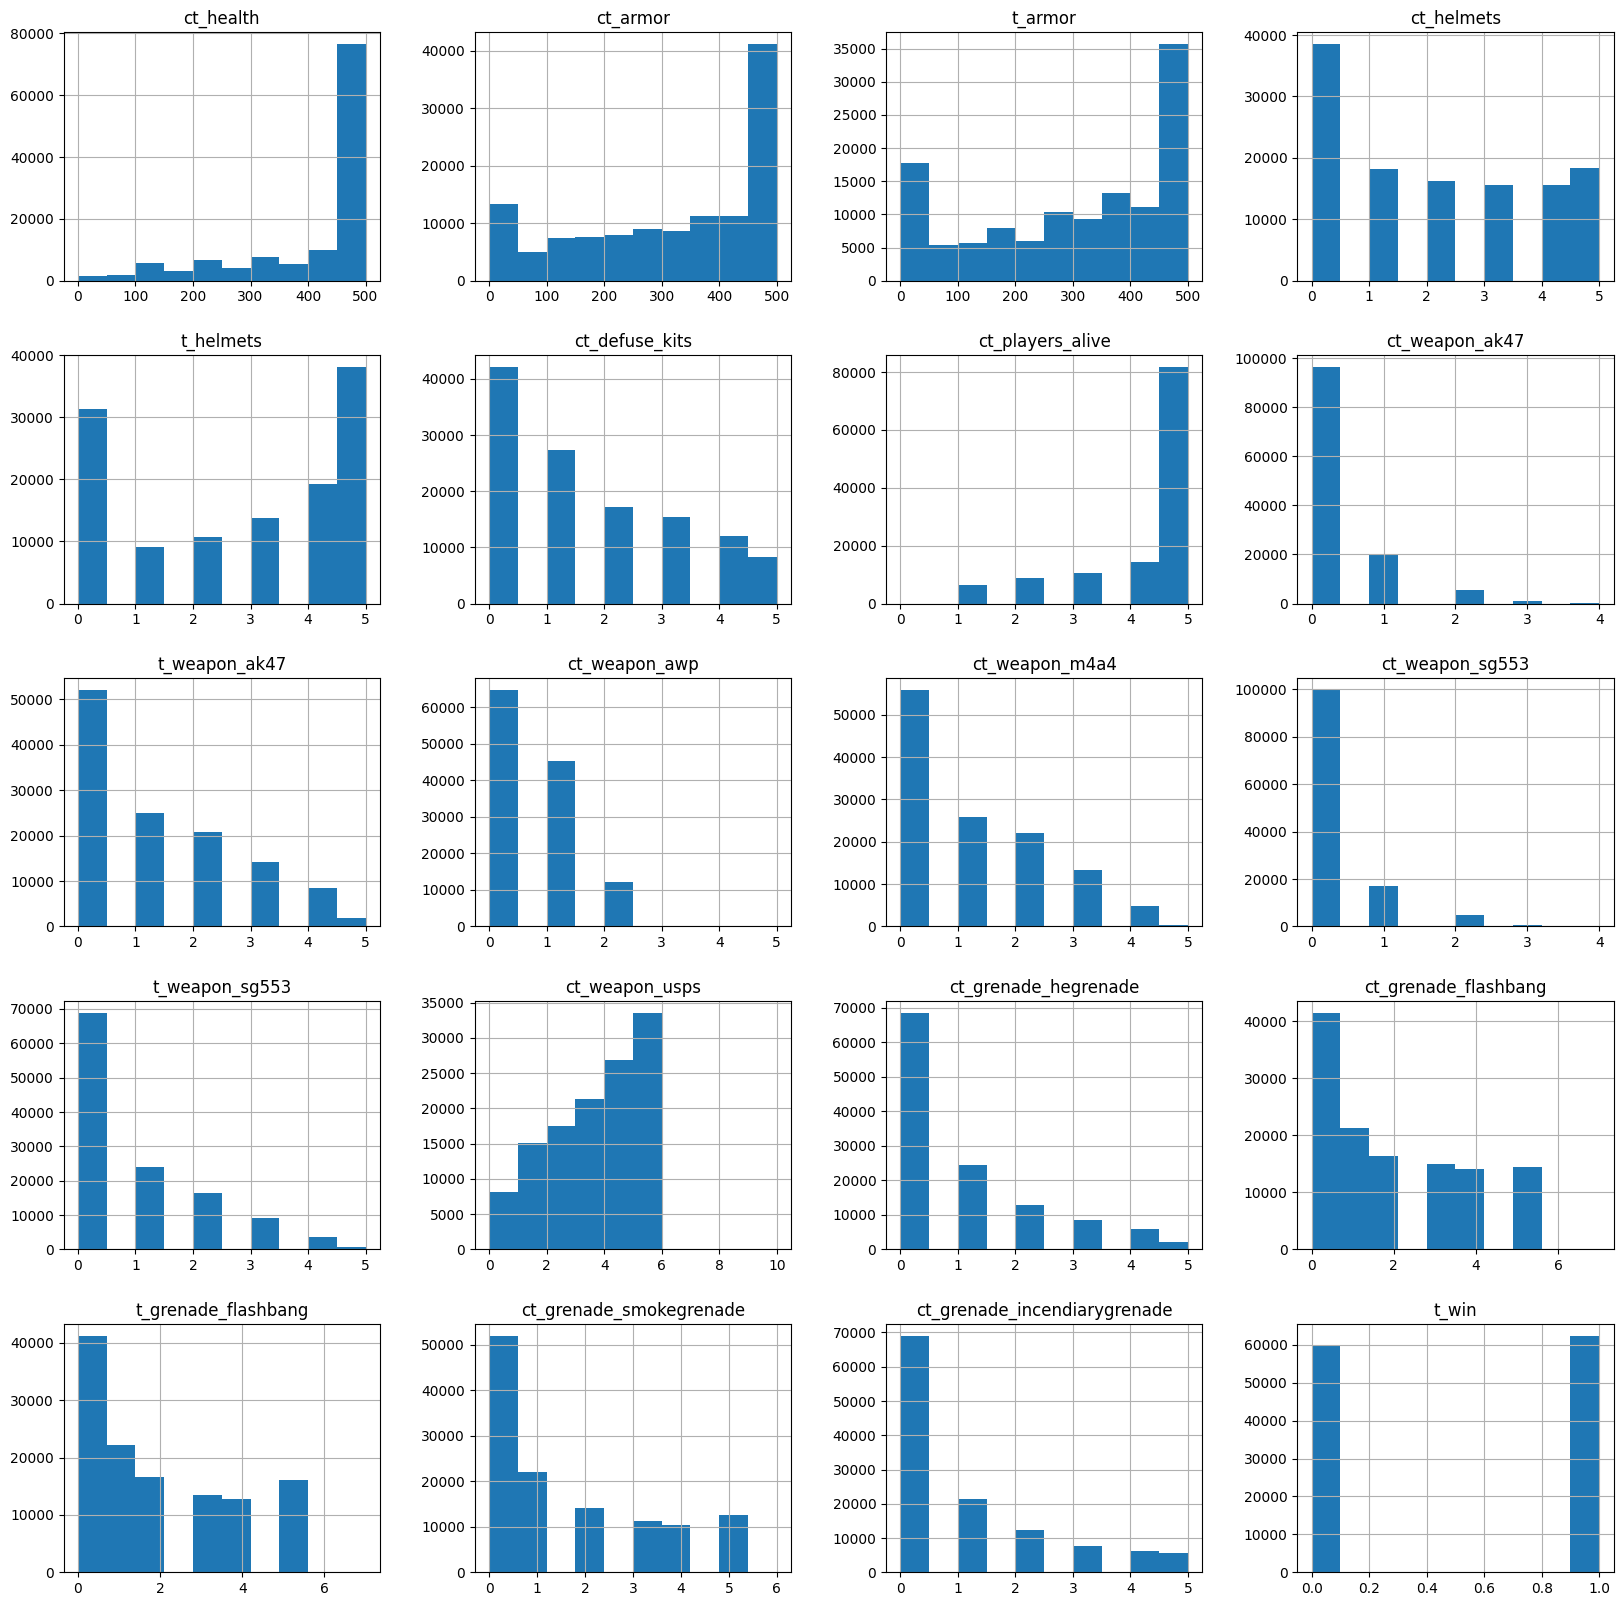

In [100]:
df_selected.hist(figsize=(20,20))

In [123]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   bomb_planted                  122410 non-null  bool   
 1   ct_health                     122410 non-null  float64
 2   ct_armor                      122410 non-null  float64
 3   t_armor                       122410 non-null  float64
 4   ct_helmets                    122410 non-null  float64
 5   t_helmets                     122410 non-null  float64
 6   ct_defuse_kits                122410 non-null  float64
 7   ct_players_alive              122410 non-null  float64
 8   ct_weapon_ak47                122410 non-null  float64
 9   t_weapon_ak47                 122410 non-null  float64
 10  ct_weapon_awp                 122410 non-null  float64
 11  ct_weapon_m4a4                122410 non-null  float64
 12  ct_weapon_sg553               122410 non-nul

In [101]:
from sklearn.model_selection import train_test_split

X,y = df_selected.drop(columns=['t_win'],axis = 1), df_selected['t_win']

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)


In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)



KNeighborsClassifier()

In [110]:
knn.score(X_test_scaled,y_test) #this is the accuracy of the model

0.7655420308798301

In [114]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'n_neighbors': list(range(5,17,2))
              ,'weights': ['uniform','distance']}

knn = KNeighborsClassifier(n_jobs=-1)

clf = RandomizedSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_iter=10, n_jobs=-1)
clf.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [115]:
knn =  clf.best_estimator_

In [116]:
knn.score(X_test_scaled,y_test) #this is the accuracy of the model

0.7820847969937097

In [117]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_jobs=-1, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [118]:
forest.score(X_test,y_test) #this is the accuracy of the model

0.8282411567682378

In [128]:
import pandas as pd

game_data = pd.DataFrame([[
    False,  # bomb_planted
    100.0,  # ct_health
    100.0,  # ct_armor
    100.0,  # t_armor
    0.0,    # ct_helmets
    5.0,    # t_helmets
    0.0,    # ct_defuse_kits
    1.0,    # ct_players_alive
    0.0,    # ct_weapon_ak47
    5.0,    # t_weapon_ak47
    1.0,    # ct_weapon_awp
    1.0,    # ct_weapon_m4a4
    0.0,    # ct_weapon_sg553
    1.0,    # t_weapon_sg553
    1.0,    # ct_weapon_usps
    1.0,    # ct_grenade_hegrenade
    1.0,    # ct_grenade_flashbang
    1.0,    # t_grenade_flashbang
    1.0,    # ct_grenade_smokegrenade
    1.0     # ct_grenade_incendiarygrenade
]], columns=[
    'bomb_planted', 'ct_health', 'ct_armor', 't_armor', 'ct_helmets', 't_helmets', 'ct_defuse_kits', 'ct_players_alive',
    'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_awp', 'ct_weapon_m4a4', 'ct_weapon_sg553', 't_weapon_sg553',
    'ct_weapon_usps', 'ct_grenade_hegrenade', 'ct_grenade_flashbang', 't_grenade_flashbang', 'ct_grenade_smokegrenade',
    'ct_grenade_incendiarygrenade'
])

# Use the `predict` method of your trained model
prediction = forest.predict(game_data)

print('The predicted outcome is', prediction)

The predicted outcome is [1]
